# 项目：可视化帕默群岛企鹅数据-沈晓乐的数据分析

## 分析目标

探索和分析企鹅种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

### 读取数据|

#### 导入所需的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 读取部分数据

In [4]:
data = pd.read_csv("Penguins.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 评估和清理数据

主要从两个方面进行：结构和内容。
数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。
cleaned_data为清理后的数据csv

In [5]:
cleaned_data = data.copy()

#### 数据的结构评估和清理

In [6]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准

#### 数据的内容评估和清理

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Non-Null Count 存在小于RangeIndex: 344，则存在缺失值，分别是，culmen_length_mm，culmen_depth_mm，flipper_length_mm，body_mass_g，sex                     

species（企鹅种类）sex（企鹅性别）、island（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [10]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [11]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 处理缺失数据

In [12]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [13]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [14]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [15]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


以上，可以看到索引为3和339的观察值，除了种类和所属岛屿外所有变量都为空，处理方法为直接删除

In [16]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

In [17]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


只缺失性别，仍然可以为分析提供价值，不用问

#### 处理重复数据

允许变量重复，不需要清洗

#### 处理不一致数据

目标：查看是否存在不同值实际指代同一目标的情况，先进行计数查看对应索引出现的次数

In [20]:
cleaned_data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [21]:
cleaned_data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [22]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

sex出现.则有不一致数据，这里并不代表雌性或者雄性，所以设为空值

In [23]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

C:\Users\33280\AppData\Local\Temp\ipykernel_24764\4142074798.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)


In [24]:
cleaned_data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### 处理无效或错误数据

describe方法快速了解

In [26]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


可以看出，数据都具有意义。这里评估和清洗工作完成。

### 探索数据

In [31]:
# 设置图表色盘为"Set2"
sns.set_palette("Set2")

In [29]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鹅种类比例

绘制饼图并给出百分比和对应标识

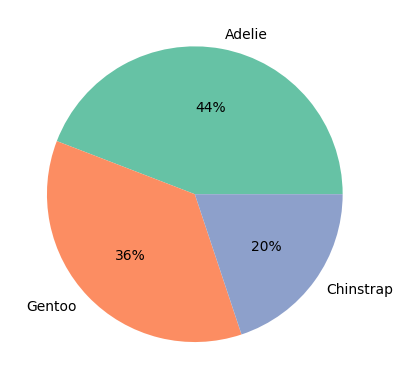

In [32]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index) #数据+百分比+标签
plt.show()

样本中Adelie为44%占比最大，Gentoo种类的占比次之，Chinstrap的占比最小

Adelie 企鹅（阿德利企鹅）
Gentoo 企鹅（巴布亚企鹅）
Chinstrap 企鹅（纹颊企鹅、颊带企鹅、帽带企鹅 ）

### 企鹅所属岛屿比例

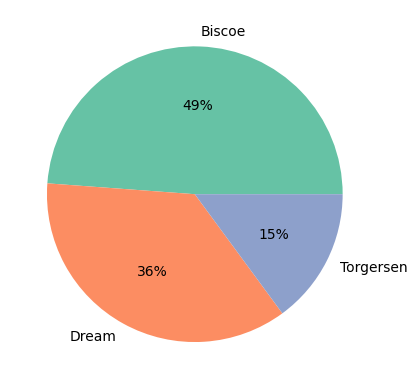

In [33]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

可见49%的Biscoe岛屿，占比最大，其次是Dream岛屿，Torgersen岛屿最少。

### 企鹅性别比例

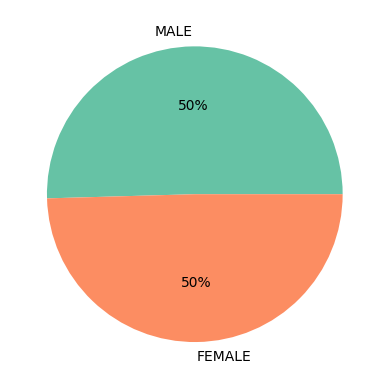

In [36]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

可见样本雌性，雄性占比一半一半

### 不同岛上的企鹅种类数量：

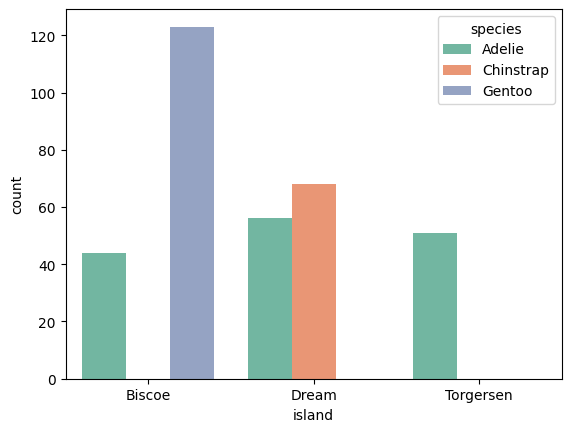

In [37]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

分析图可见Adelie种类的企鹅样本在Biscoe、Dream、Torgersen这三个岛上都有，而Chinstrap种类只在Dream岛上才有，Gentoo只在Biscoe岛上才有

### 查看数值之间的相关关系

绘制配对关系图查看

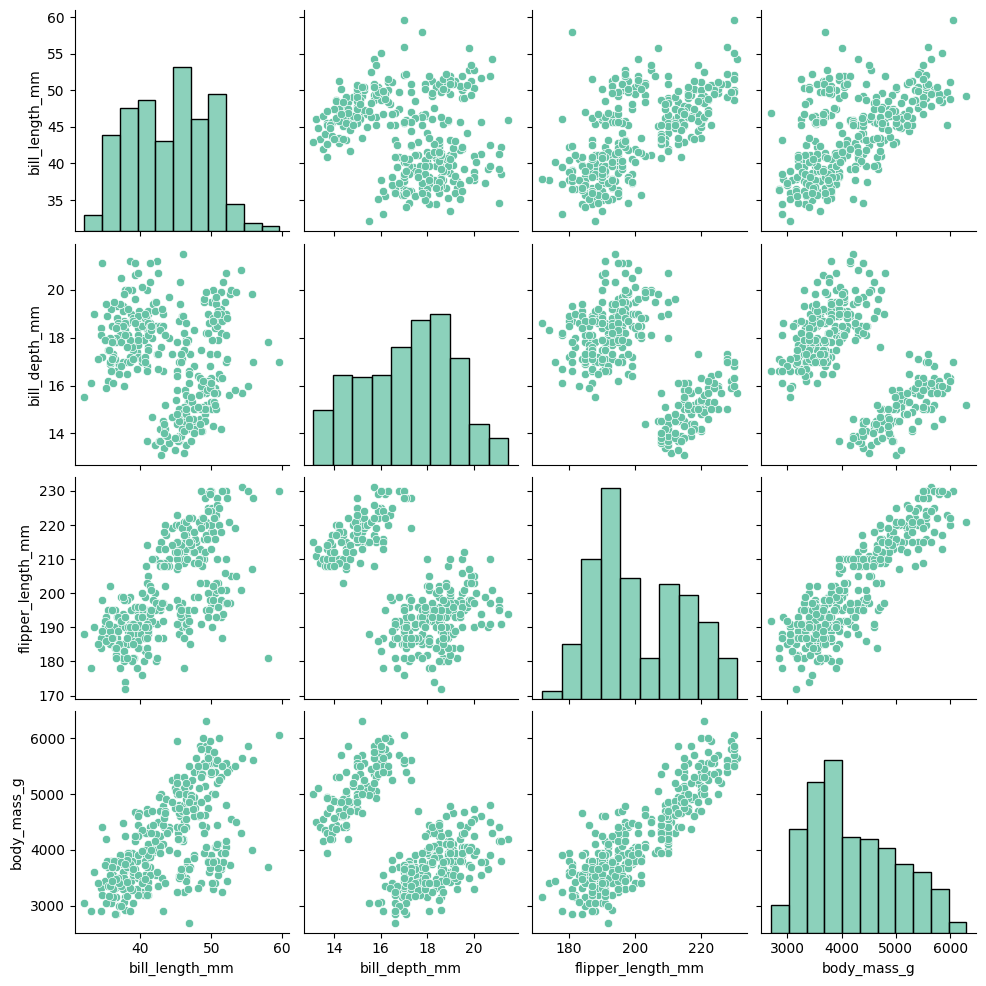

In [46]:
sns.pairplot(cleaned_data)  # 创建配对图，展示数据集中所有数值列之间的关系
plt.show()                  # 显示图形

直方图：可以看出，存在双峰分布，接下来分析是哪些因素影响的。
散点图：可以看出（1）线性关系（2）集群，接下来分析是什么因素影响的。
下面通过种类分析。

### 根据种类查看数值之间的关系

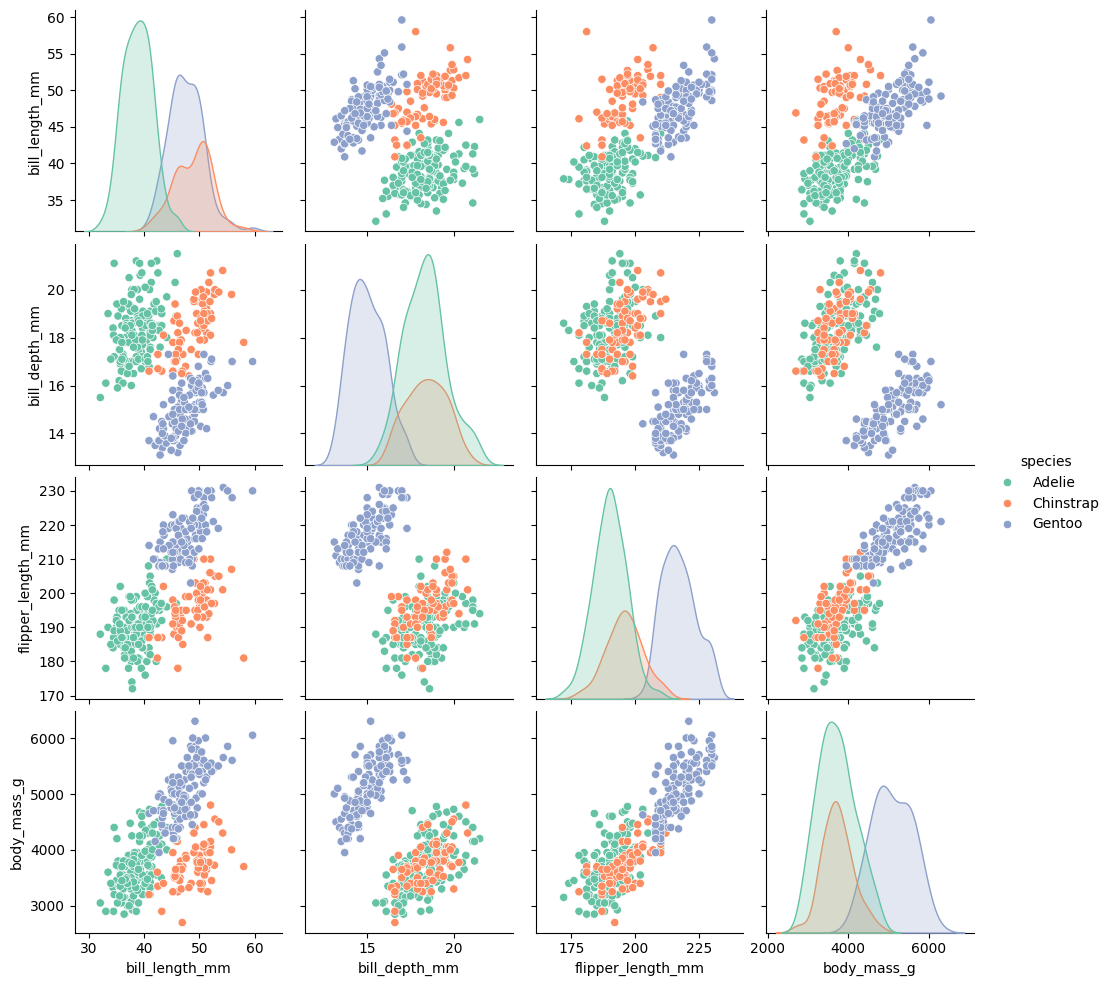

In [51]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性

使用回归线观察数值

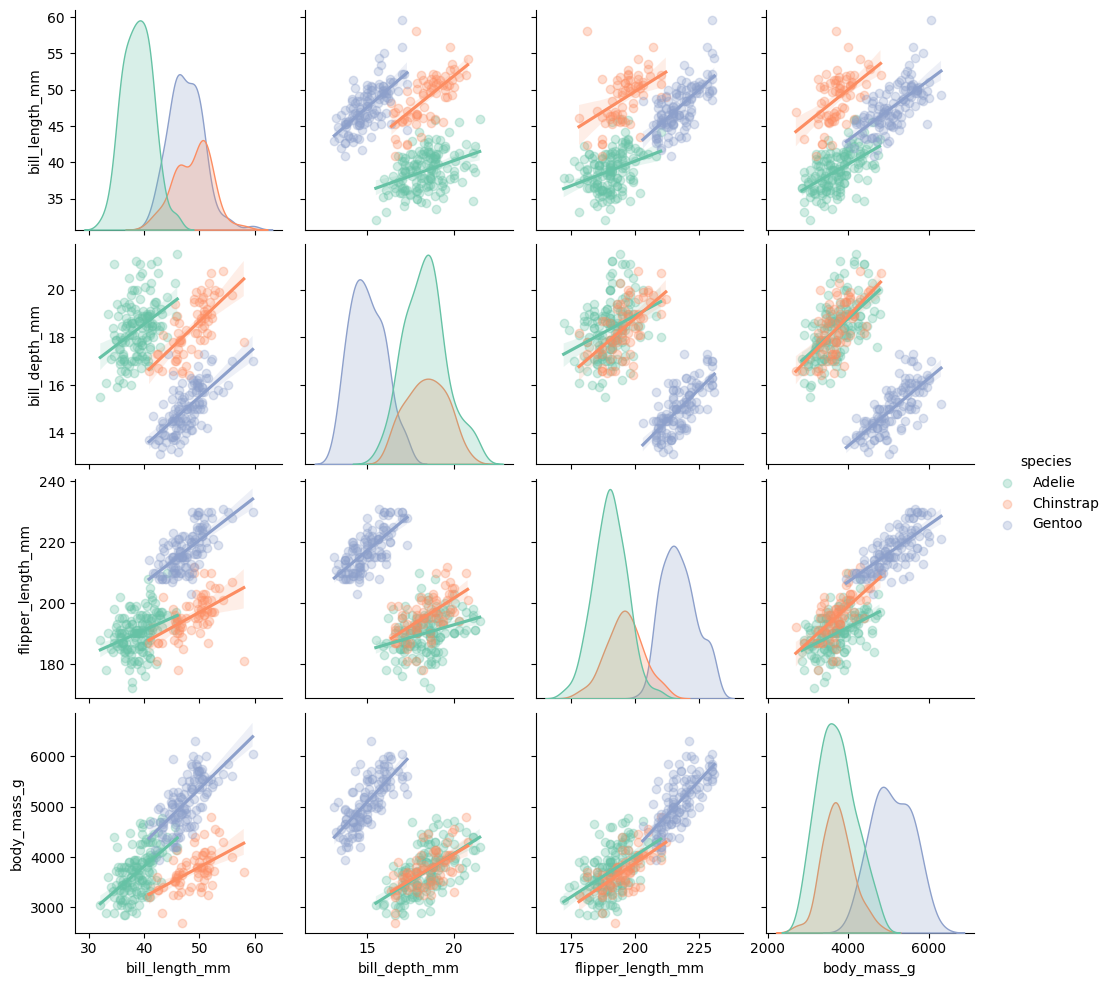

In [54]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：  

Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短（峰值靠左）。  
Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短（峰值靠左）。  
Adelie的鳍长度最短（峰值靠左），Chinstrap中等，而Gentoo的鳍长度更长（峰值靠右）。  
Adelie和Chinstrap的体重量范围较为接近，而Gentoo的体重量更大（峰值靠右）。  

### 根据性别查看数值之间的相关关系|

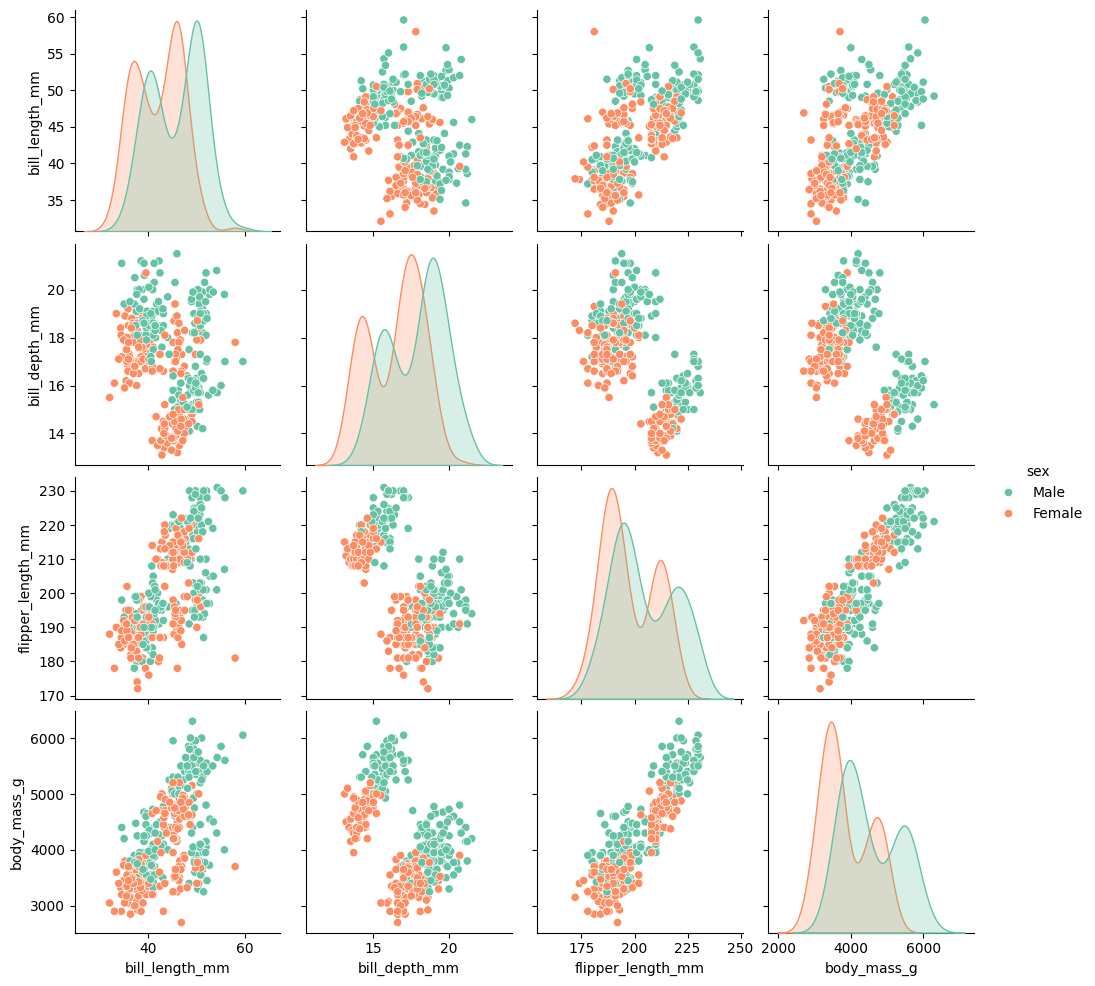

In [56]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

根据性别划分后可以看出，样本中雄性企鹅（靠右）在各项属性数值方面大于雌性企鹅。